In [ ]:
# Problem of tow of the miniproject2
# https://drive.google.com/file/d/10tPqOdp2qI5ws9psPQLebzD46eKTKFF7/view?usp=sharing
#https://drive.google.com/file/d/19P8hg1V5dpqzd4w-2fUpdpu7vSA8y0OX/view?usp=sharing
#https://drive.google.com/file/d/1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown

!gdown 10tPqOdp2qI5ws9psPQLebzD46eKTKFF7
!gdown 19P8hg1V5dpqzd4w-2fUpdpu7vSA8y0OX
!gdown  13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy
!gdown 1XMMdJcKMejiRdxWQQHhaBqgKur9lI64Q

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From (original): https://drive.google.com/uc?id=10tPqOdp2qI5ws9psPQLebzD46eKTKFF7
From (redirected): https://drive.google.com/uc?id=10tPqOdp2qI5ws9psPQLebzD46eKTKFF7&confirm=t&uuid=c6cd2bc3-198d-4c5d-950f-6bbf88002e9c
To: /content/data_fault1.mat
100% 2.92M/2.92M [00:00<00:00, 39.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=19P8hg1V5dpqzd4w-2fUpdpu7vSA8y0OX
From (redirected): https://drive.google.com/uc?id=19P8hg1V5dpqzd4w-2fUpdpu7vSA8y0OX&confirm=t&uuid=1636a2f6-921f-4d48-9f10-d77882c8b36b
To: /content/data_fault2.mat
100% 2.94M/2.94M [00:00<00:00, 32.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy
From (redirected): https://drive.google.com/uc?id=13Wng5vLnuzmTX3zpDpRHRvUWFc_7GzOy&confirm=t&uuid=0f7205f1-56ec-4623-aa4f-527fc72a95ce
To: /content/

In [ ]:
# Problem 2.1 Fault data Classification: In this code, the classification of the CWRU Bearing datasets with MLP networks are done.
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

data1 = loadmat('data_fault.mat')
data2 = loadmat('data_fault1.mat')
data3 = loadmat('data_fault2.mat')
data4 = loadmat('data_normal.mat')
# Class of normal data
data_normal = data4['X100_DE_time']
print(data_normal.shape)
# Class of fault data
data_fault = data1['X108_DE_time']
data_fault1 = data2['X121_DE_time']
data_fault2 = data3['X147_DE_time']
print(data_fault.shape)

(485643, 1)
(122917, 1)


In [ ]:
# Problem 2.1
import numpy as np

num_samples=100
sample_length=1000
def create_samples_matrix(data, num_samples =100, sample_length = 1000):
    samples_matrix = np.zeros((num_samples, sample_length))
    for i in range(num_samples):
        start_index = i * sample_length
        end_index = start_index + sample_length
        samples_matrix[i, :] = data[start_index:end_index].flatten()
    return samples_matrix
# num_samples=500
samples_matrix_normal = create_samples_matrix(data_normal)
print(samples_matrix_normal.shape)

samples_matrix_fault1 = create_samples_matrix((data_fault) )
samples_matrix_fault2 = create_samples_matrix((data_fault1) )
samples_matrix_fault3 = create_samples_matrix((data_fault2) )
print(samples_matrix_fault2.shape)


(100, 1000)
(100, 1000)


(400, 2)
(400, 2)
(400, 2)
(400, 2)
(400, 2)
(400, 2)
(400, 2)
(400, 2)


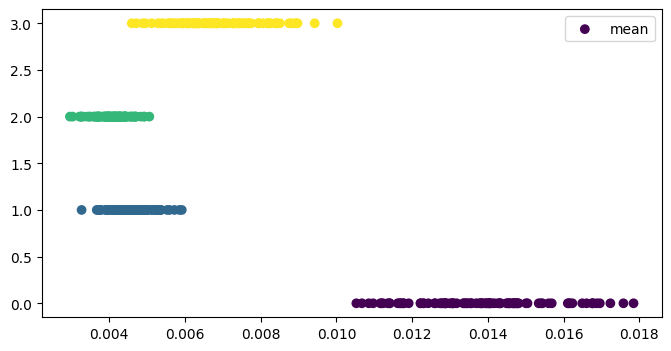

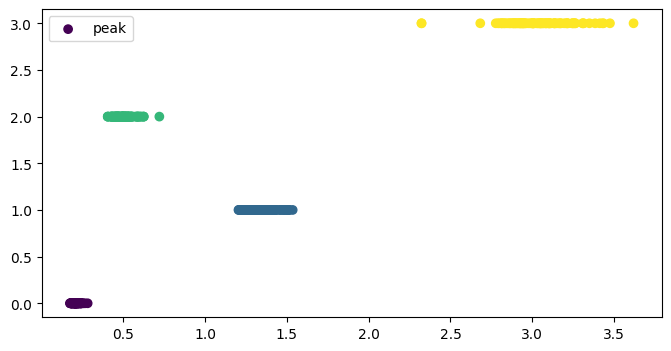

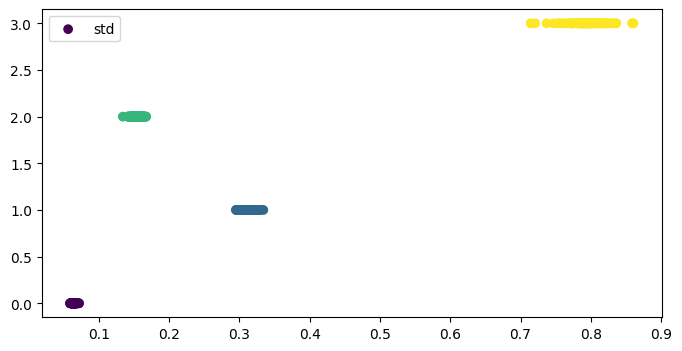

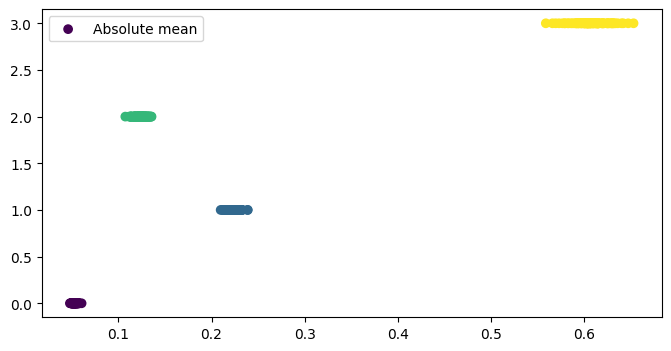

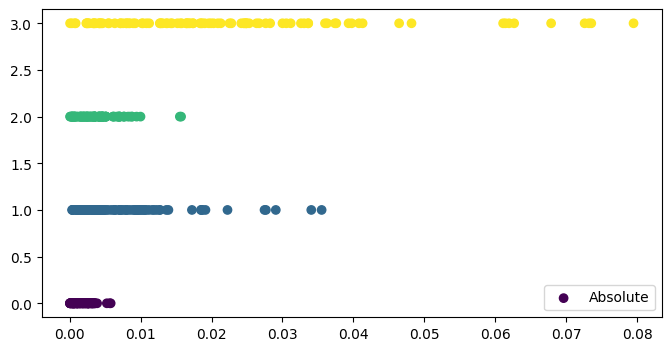

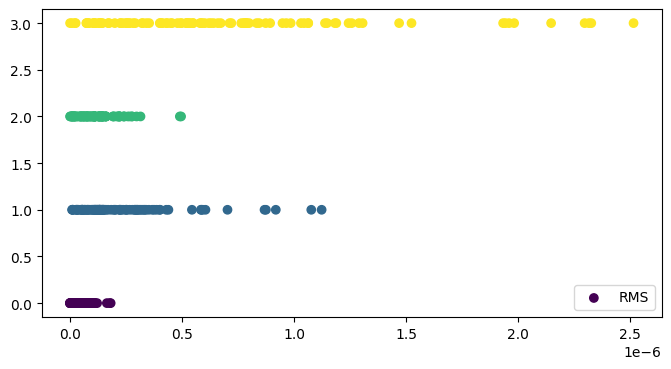

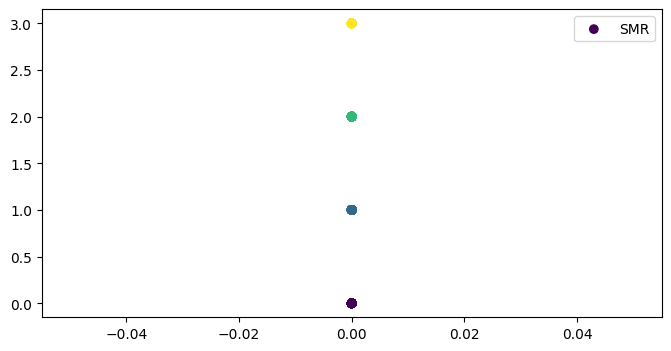

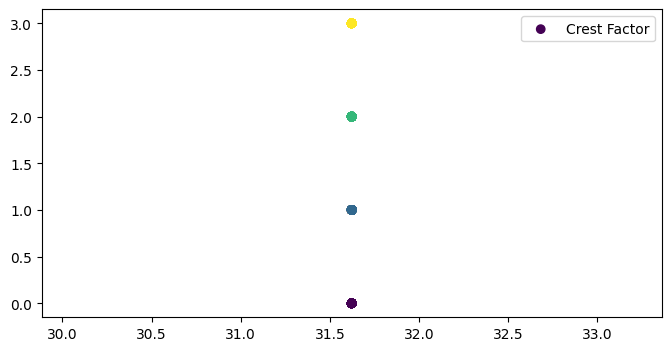

In [ ]:
import matplotlib.pyplot as plt

# Create Mean feature 1
# Create fault and normal matrix data with labels
data_Extracted = np.concatenate([
    [(np.mean((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(np.mean((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(np.mean((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(np.mean((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])

print(data_Extracted.shape)

# Create Peak feature 2
data_Extracted1 = np.concatenate([
    [(np.max(np.abs(samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(np.max(np.abs(samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(np.max(np.abs(samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(np.max(np.abs(samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])

print(data_Extracted1.shape)
# Create std feature 3
data_Extracted2 = np.concatenate([
    [(np.std((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(np.std((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(np.std((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(np.std((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])

print(data_Extracted2.shape)
# Create Absolute mean feature 4
data_Extracted3 = np.concatenate([
    [(np.mean(np.abs(samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(np.mean(np.abs(samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(np.mean(np.abs(samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(np.mean(np.abs(samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])

print(data_Extracted3.shape)
#  Create RMS feature 5
def RMS(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares = (x[i])**2
    return np.sqrt(sum_of_squares/len(x))
data_Extracted4 = np.concatenate([
    [(RMS((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(RMS((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(RMS((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(RMS((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])
print(data_Extracted4.shape)

#  Create Square Mean Root  SMR feature 6
def SMR(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.abs(x[i])
    return (np.sqrt(sum_of_squares)/len(x))**2
data_Extracted5 = np.concatenate([
    [(SMR((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(SMR((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(SMR((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(SMR((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])
print(data_Extracted5.shape)
#  Create Square Mean Root  SMR feature 7
def Peak_to_Peak(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.max(x[i])-np.min(x[i])
    return (sum_of_squares)
data_Extracted6 = np.concatenate([
    [(Peak_to_Peak((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(Peak_to_Peak((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(Peak_to_Peak((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(Peak_to_Peak((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])
print(data_Extracted3.shape)
#  Create Crest Factor feature 8
def CF(x):
  sum_of_squares=0
  for i in range(len(x)):
    sum_of_squares =np.max(np.abs(x[i]))
    return (sum_of_squares)/RMS(x)
data_Extracted7 = np.concatenate([
    [(CF((samples_matrix_normal[i, :])), 0) for i in range(num_samples)],
    [(CF((samples_matrix_fault1[i, :])), 1) for i in range(num_samples)],
    [(CF((samples_matrix_fault2[i, :])), 2) for i in range(num_samples)],
    [(CF((samples_matrix_fault3[i, :])), 3) for i in range(num_samples)]
])
print(data_Extracted.shape)
# plot result of new datas
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted[:,0] ,data_Extracted[:,1], c=data_Extracted[:,1],label = 'mean')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted1[:,0] ,data_Extracted1[:,1], c=data_Extracted1[:,1],label = 'peak')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted2[:,0] ,data_Extracted2[:,1], c=data_Extracted2[:,1],label = 'std')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted3[:,0] ,data_Extracted3[:,1], c=data_Extracted3[:,1],label = 'Absolute mean')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted4[:,0] ,data_Extracted4[:,1], c=data_Extracted4[:,1],label = 'Absolute')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted5[:,0] ,data_Extracted5[:,1], c=data_Extracted5[:,1],label = 'RMS')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted6[:,0] ,data_Extracted6[:,1], c=data_Extracted6[:,1],label = 'SMR')
plt.legend()
plt.figure(figsize=(8, 4))
plt.scatter(data_Extracted7[:,0] ,data_Extracted7[:,1], c=data_Extracted7[:,1],label = 'Crest Factor')
plt.legend()
plt.show()

In [ ]:
# Chose one label and 5 feature
labels_column = data_Extracted[:, -1]
labels_column = labels_column.reshape(-1, 1)
# eiliminate the redundant labels
data_Extracted = np.delete(data_Extracted, -1, axis=1)
data_Extracted1 = np.delete(data_Extracted1, -1, axis=1)
data_Extracted2 = np.delete(data_Extracted2, -1, axis=1)
data_Extracted3 = np.delete(data_Extracted3, -1, axis=1)
data_Extracted4 = np.delete(data_Extracted4, -1, axis=1)
data_Extracted5 = np.delete(data_Extracted5, -1, axis=1)
data_Extracted6 = np.delete(data_Extracted6, -1, axis=1)
data_Extracted7 = np.delete(data_Extracted7, -1, axis=1)

# concatenate the datas
all_features = np.concatenate((data_Extracted, data_Extracted1, data_Extracted2, data_Extracted3, data_Extracted4, data_Extracted5, data_Extracted6, data_Extracted7,labels_column ), axis=1)
all_features.shape

(400, 9)

**Data shuffling**

In [ ]:
# problem 2.1 np.vstack(
data_Extracted_S = all_features
data_Extracted_S = np.random.permutation(data_Extracted_S)
# data_Extracted_shuffled = data_Extracted_S[np.random.permutation(data_Extracted.shape[0]), :]
print("Real data, Shuffle data:")
data_Extracted, data_Extracted_S
# Cerate train and test data on new shuffle data
# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_Extracted_S[:,:-1], data_Extracted_S[:,-1], test_size=0.2, random_state=16)
print("X_test, y_test")
data_Extracted_S.shape

Real data, Shuffle data:
X_test, y_test


(400, 9)

In [ ]:
data_Extracted_S

**Normalized Datasets**

In [ ]:
# problem 2.1

def min_max_scaler(data):

  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  return (data - min_values) / (max_values - min_values)
normalized_data = min_max_scaler(data_Extracted2[:,:-1])

print(normalized_data)

[]


**LinearRegression**

In [ ]:
# Problem 2.1
def sigmoid(x):
    return 1 / (1 + np.exp(-0.02*x))
def logistic_regression(x, w):
    y_hat = sigmoid(np.dot(x, w))
    return y_hat
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [ ]:
# Linear Regressions (2.4)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
iteration=300  # Sample
# Training of Logistic Regression model
logistic_model = LogisticRegression(solver='sag',max_iter=iteration, random_state=16)
logistic_model.fit(X_train , y_train )
predict = logistic_model.predict(X_test )
# Validation of Accuracy
Ac_train = logistic_model.score(X_train, y_train.reshape(-1, 1))
Ac_test = logistic_model.score(X_test , y_test )
print("Logistic Regression Model:")
print("Training accuracy, Testing accuracy:", Ac_train, Ac_test)

Logistic Regression Model:
Training accuracy, Testing accuracy: 1.0 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Predicted Labels for test data')

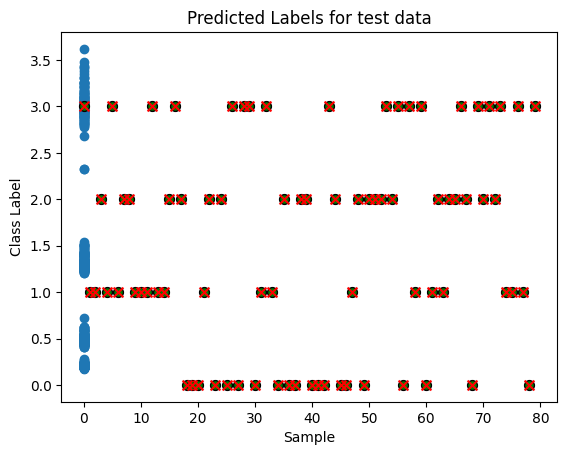

In [ ]:
from mlxtend.plotting import plot_decision_regions
# Assuming X has more than 2 features, add filler values
filler_feature_values = {2: 0}  # Filler value for the 3rd feature
X = data_Extracted_S[:,0]
y = data_Extracted_S[:,1]
y_pred1 = logistic_model.predict(X_test )

plt.figure(1)
plt.scatter(X,y)

 # Plot the real labels
plt.figure
plt.scatter(range(len(y_test)), y_test, c='g', marker='o', edgecolors='k', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred1)), y_pred1, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')

**MLP(SKLearn)**

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# MLP Classifire
from sklearn.model_selection import validation_curve
from tensorflow.keras.callbacks import History
# model = MLPClassifier(hidden_layer_sizes=(40, 20,5),random_state=16, verbose = True, loss='log_loss')
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 20,10), activation = 'relu' ,random_state=16, verbose = 0)
history = History()
Training = model_mlp.fit(X_train , y_train)
accuracy_mlp = model_mlp.score(X_test , y_test )



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


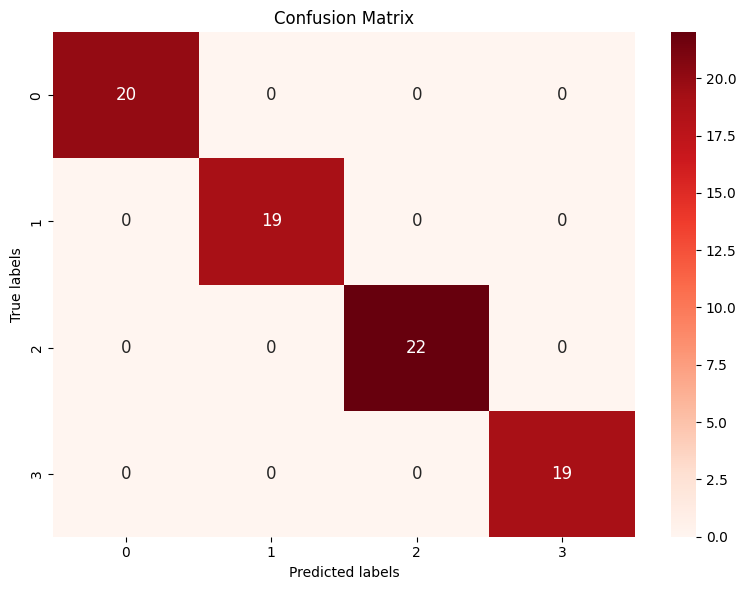

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        22
         3.0       1.00      1.00      1.00        19

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

test_accuracy: 1.0


In [ ]:
# Making predictions on the test set
y_pred_mlp = model_mlp.predict(X_test )
accuracy_mlp = model_mlp.score(X_test ,y_test )
Loss = model_mlp.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_mlp)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("test_accuracy:", accuracy_mlp)

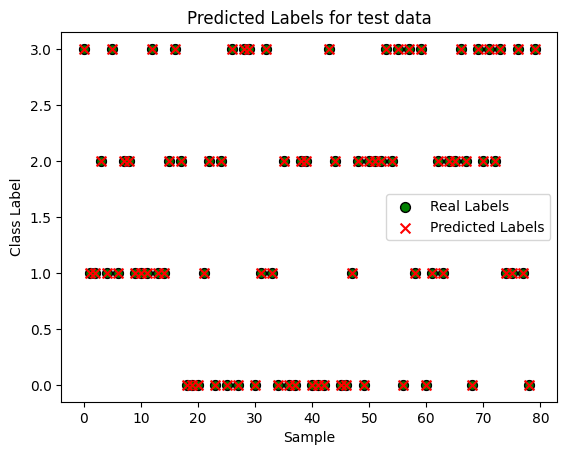

In [ ]:
 # Plot the real labels
plt.figure
plt.scatter(range(len(y_test)), y_test, c='g', marker='o', edgecolors='k', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred1)), y_pred_mlp, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')
plt.legend()

Text(0.5, 0, 'Sample')

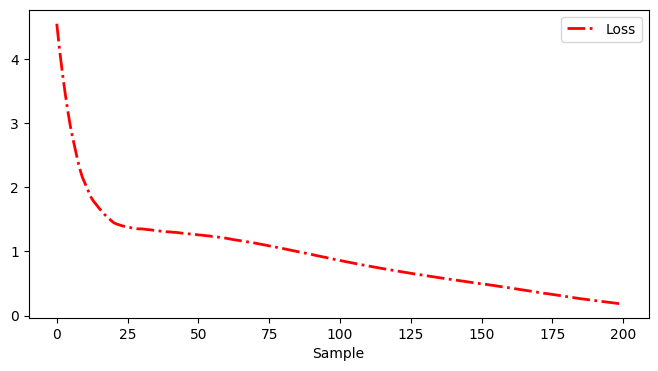

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(Loss,'-.r',label = 'Loss', linewidth = 2)
plt.legend()
plt.xlabel('Sample')


# MLP (from tensorflow)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

# Initialize the Sequential model
model_1 = Sequential()
X_train = X_train

# Add a hidden layer with 50 neurons, ReLU activation function, dropout, and L2 regularization
model_1.add(Dense(90, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization added
model_1.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization added
# Add an output layer with 1 neuron and linear activation function
model_1.add(Dense(1, activation='linear'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 90)                810       
                                                                 
 dense_4 (Dense)             (None, 30)                2730      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3571 (13.95 KB)
Trainable params: 3571 (13.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.callbacks import History
# Model compilation
# Loss functions: loss='hinge', 'mse', 'hinge', 'mae', 'categorical_crossentropy'
model_1.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
history = History()
# Define a checkpoint to save the best model during training

# Training with callbacks
history = model_1.fit(X_train, y_train, validation_split=0.2, epochs=600,callbacks=[history],
                      verbose=0)


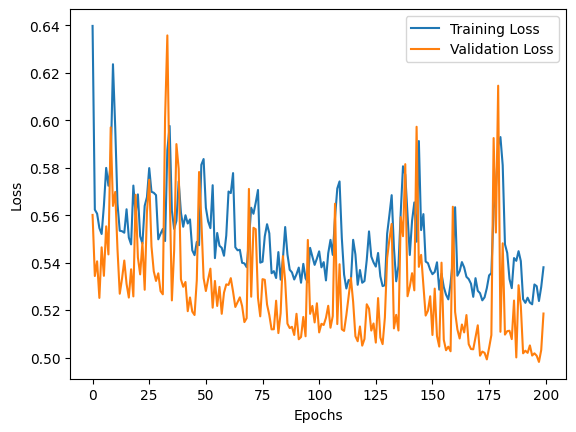

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

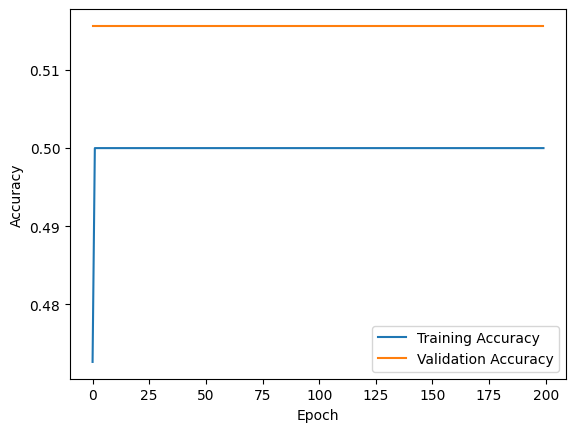

In [ ]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


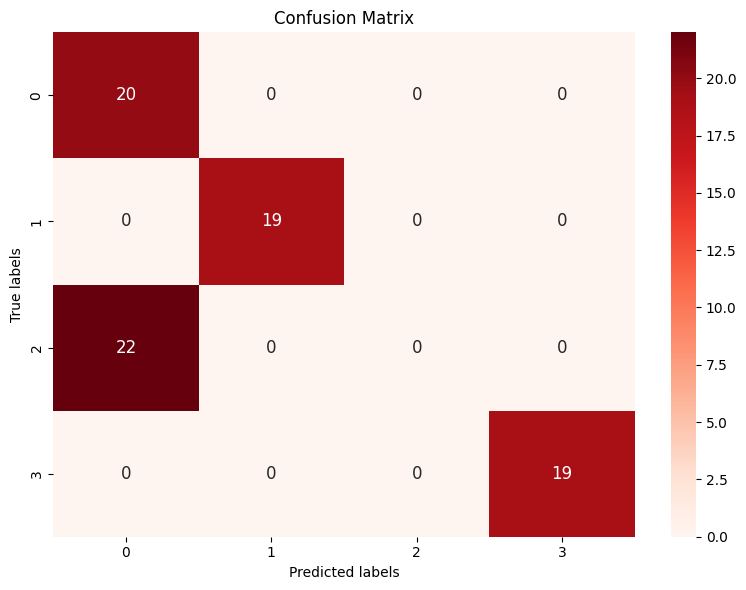

Classification Report:


In [ ]:
# Making predictions on the test set
y_pred_2 = np.round(model_1.predict(X_test))
# accuracy_TF = model_1.score(X_test,y_test)
# Loss = model_1.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_2)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
# print(classification_report(y_test, y_pred_2))
# print("test_accuracy:", accuracy_mlp)

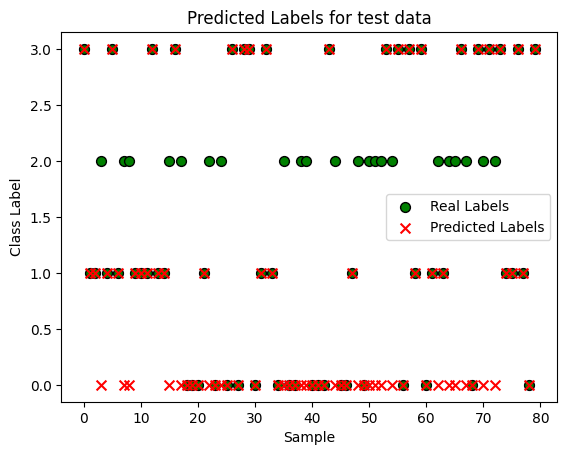

In [ ]:
 # Plot the real labels
plt.figure
plt.scatter(range(len(y_test)), y_test, c='g', marker='o', edgecolors='k', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred_2)), y_pred_2, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')
plt.legend()

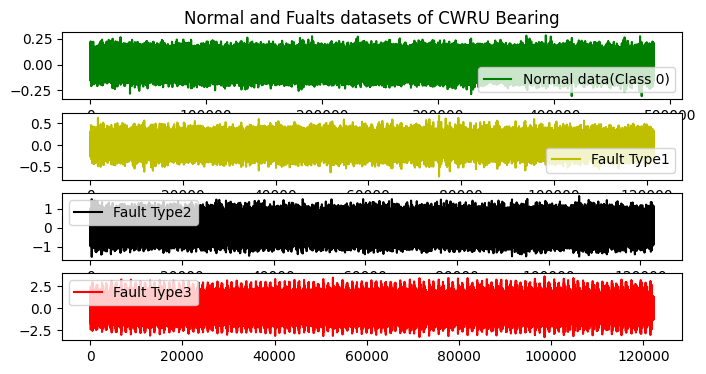

In [ ]:
# plot datas normal and fault

plt.figure(figsize=(8, 4))
plt.subplot(411)
plt.plot(data_normal,'g',label = 'Normal data(Class 0)')
plt.title('Normal and Fualts datasets of CWRU Bearing')
plt.legend()
plt.subplot(412)
plt.plot(data_fault1,'y',label = 'Fault Type1')
plt.legend()
plt.subplot(413)
plt.plot(data_fault,'k',label = 'Fault Type2')
plt.legend()
plt.subplot(414)
plt.plot(data_fault2,'r',label = 'Fault Type3')
plt.legend()

### K-Fold Cross Validation
Problem 2.4

In [ ]:
from sklearn.model_selection import KFold
# MLP Classifire
from sklearn.model_selection import validation_curve
# model = MLPClassifier(hidden_layer_sizes=(40, 20,5),random_state=16, verbose = True, loss='log_loss')
model_mlp_KF = MLPClassifier(hidden_layer_sizes=(40, 30,10), activation = 'relu' ,random_state=16, verbose = 0)
X = data_Extracted_S[:,:-1]
y = data_Extracted_S[:,-1]
kf = KFold(n_splits=5)
Acc = []
for train_index, test_index in kf.split(X):
    # print("\nTRAIN:", train_index, "\nTEST:", test_index)
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]
    model_mlp_KF.fit(X_train_kf, y_train_kf)
    y_pred = model_mlp_KF.predict(X_test_kf)
    Acc.append(accuracy_score(y_test_kf, y_pred))
Acc = np.array(Acc)
print(Acc)
print('mean Acc', Acc.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[1. 1. 1. 1. 1.]
mean Acc 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


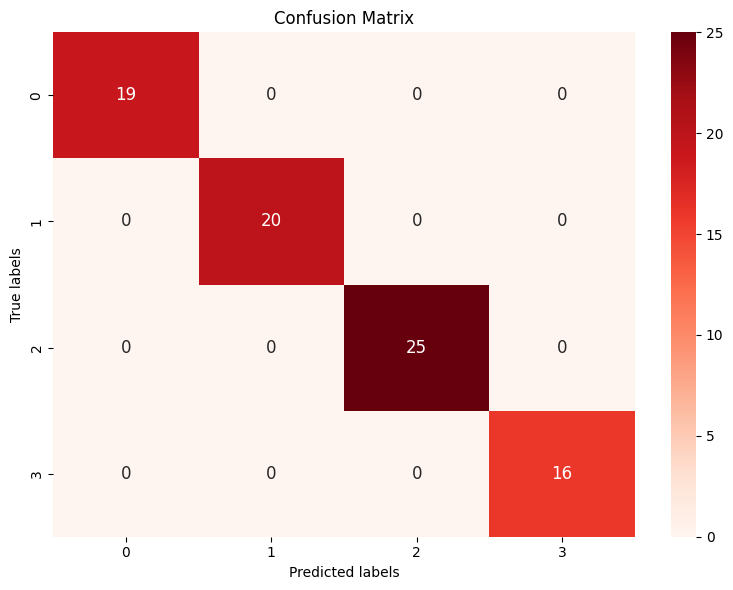

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        25
         3.0       1.00      1.00      1.00        16

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

test_accuracy: 1.0


In [ ]:
# Making predictions on the test set
y_pred_mlp_KF = model_mlp_KF.predict(X_test_kf )
accuracy_mlp_KF = model_mlp_KF.score(X_test_kf ,y_test_kf )
Loss = model_mlp_KF.loss_curve_
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test_kf, y_pred_mlp_KF)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Reds', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test_kf)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test_kf, y_pred_mlp_KF))
print("test_accuracy:", accuracy_mlp_KF)

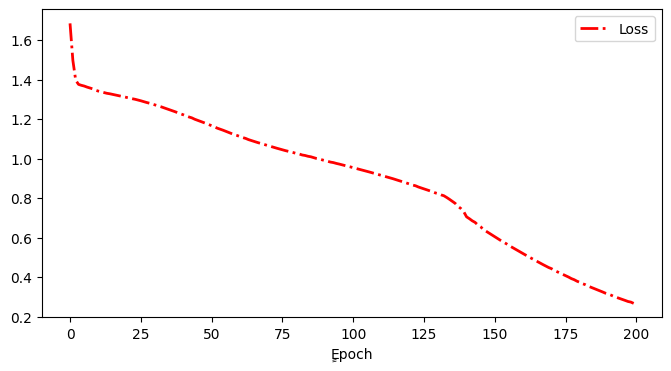

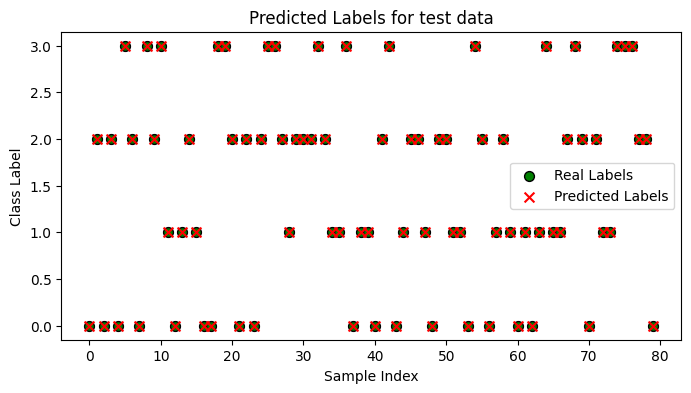

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(Loss,'-.r',label = 'Loss', linewidth = 2)
plt.legend()
plt.xlabel('ٍEpoch')
 # Plot the real labels
plt.figure(figsize=(8, 4))
plt.scatter(range(len(y_test_kf)), y_test_kf, c='g', marker='o', edgecolors='k', label='Real Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Real Labels')
# Plot the predicted labels
plt.scatter(range(len(y_pred_mlp_KF)), y_pred_mlp_KF, c='r', marker='x', label='Predicted Labels', s=50)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Predicted Labels for test data')
plt.legend()